<a href="https://colab.research.google.com/github/BritneyMuller/colab-notebooks/blob/master/Time_Series_Traffic_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OUTDATED: PLEASE USE: https://github.com/BritneyMuller/colab-notebooks/blob/master/Updated_Prophet_Time_Series_Forecasting.ipynb 
This Notebook was created by [Britney Muller](http://twitter.com/BritneyMuller) from Facebook's open source [Prophet time-series prediction model](https://facebook.github.io/prophet/):

#Hold Shift + Return to run the below cell and upload your timeseries.csv data. 
You can use this to predict any numerical values that occur over time (sales, traffic, number of cookies you eat a day, twitter activity by large babies, etc.)

##Headers must look like the following.
## Columns:

###Ds = month/day/year (acsending)

### Y = timeseries data (make sure to remove decimals & commas)
![alt text](https://i.imgur.com/QebUg9F.png)



#Run the following cell & upload your time series data 

Use 3+ years worth of time series data for optimal predictions.

In [18]:
# Import nessecary libraries and data. [Shift + Return to run cell]
import os
import yaml
import datetime
from datetime import date
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)

#import plotly.offline as py
#py.init_notebook_mode()

# Did some pre processing of the CSV. 
# Specficially I:
#   - truncated a bunch of notes at the top of the file
 #   - removed some whitespace at the end of file

from google.colab import files
uploaded = files.upload()

#Upload your Time Series data:

Saving PP-traffic.csv to PP-traffic (2).csv


<Figure size 640x480 with 0 Axes>

#Import data into a Pandas dataframe:

Change the below .csv name to match your upload!

In [19]:
import io
df = pd.read_csv(io.BytesIO(uploaded['PP-traffic.csv'])) #<--Change .csv name to your uploaded .csv name.
# Dataset is now stored in a Pandas Dataframe


#Validate the dataframe's head (top 5 rows)

In [20]:
df.head()

,Ds,Y
0,6/16/17,179989
1,6/17/17,155049
2,6/18/17,164102
3,6/19/17,229740
4,6/20/17,222326


# Explore known dataframe types (not necessary, but good to know)

In [21]:
print(df.dtypes)

Ds    object
Y      int64
dtype: object


#Drop extra columns to clean up your dataframe

In [22]:
#data cleanup
df['ds'] = df['Ds']
df['y'] = df['Y']
#drop extra columns
df = df[['ds', 'y']]

#Reevaluate your dataframe's head:

In [23]:
df.head()

,ds,y
0,6/16/17,179989
1,6/17/17,155049
2,6/18/17,164102
3,6/19/17,229740
4,6/20/17,222326


##Convert to a date time

In [24]:
#df['ds'] = df['ds'].astype('datetime64[ns]')
df['ds'] = pd.to_datetime(df['ds'])

#Make model & fit it to your data

In [25]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#Make a future data frame

In [26]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1128,2020-07-18
1129,2020-07-19
1130,2020-07-20
1131,2020-07-21
1132,2020-07-22


#Predict future data over a period of time 

After running the below cell, scroll all the way over to the right. The 'yhat' values are the predictions for each of the following days.

Modify the number of days predicted by changing forecast.tail(*X*)

In [27]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1103,2020-06-23,461057.200827,451058.931599,542928.509468,461057.200827,461057.200827,35995.650968,35995.650968,35995.650968,39598.284793,39598.284793,39598.284793,-3602.633825,-3602.633825,-3602.633825,0.0,0.0,0.0,497052.851795
1104,2020-06-24,460653.048454,436589.539475,530360.077949,460653.048454,460653.048454,24298.514283,24298.514283,24298.514283,28745.998390,28745.998390,28745.998390,-4447.484107,-4447.484107,-4447.484107,0.0,0.0,0.0,484951.562737
1105,2020-06-25,460248.896081,424427.409989,512550.341936,460248.896081,460248.896081,9726.986471,9726.986471,9726.986471,15050.210900,15050.210900,15050.210900,-5323.224429,-5323.224429,-5323.224429,0.0,0.0,0.0,469975.882552
1106,2020-06-26,459844.743708,386402.642874,475512.222565,459844.743708,459844.743708,-30363.549676,-30363.549676,-30363.549676,-24136.903315,-24136.903315,-24136.903315,-6226.646361,-6226.646361,-6226.646361,0.0,0.0,0.0,429481.194032
1107,2020-06-27,459440.591335,339579.788954,431327.043770,459440.591335,459440.591335,-73067.815449,-73067.815449,-73067.815449,-65914.598251,-65914.598251,-65914.598251,-7153.217199,-7153.217199,-7153.217199,0.0,0.0,0.0,386372.775886
1108,2020-06-28,459036.438963,370979.750634,457971.636571,459036.438963,459036.438963,-44356.615387,-44356.615387,-44356.615387,-36259.367674,-36259.367674,-36259.367674,-8097.247714,-8097.247714,-8097.247714,0.0,0.0,0.0,414679.823575
1109,2020-06-29,458632.286590,447013.335730,538383.018388,458632.286590,458632.286590,33864.292540,33864.292540,33864.292540,42916.375157,42916.375157,42916.375157,-9052.082617,-9052.082617,-9052.082617,0.0,0.0,0.0,492496.579129
1110,2020-06-30,458228.134217,442058.462091,536551.136214,458228.134217,458228.134217,29587.977471,29587.977471,29587.977471,39598.284793,39598.284793,39598.284793,-10010.307322,-10010.307322,-10010.307322,0.0,0.0,0.0,487816.111688
1111,2020-07-01,457823.981844,430401.908785,520331.227429,457802.769004,457839.328915,17782.033829,17782.033829,17782.033829,28745.998390,28745.998390,28745.998390,-10963.964561,-10963.964561,-10963.964561,0.0,0.0,0.0,475606.015672
1112,2020-07-02,457419.829471,418169.707247,505479.182207,457375.009250,457483.571209,3145.436305,3145.436305,3145.436305,15050.210900,15050.210900,15050.210900,-11904.774595,-11904.774595,-11904.774595,0.0,0.0,0.0,460565.265776


#Plot the model's prediction

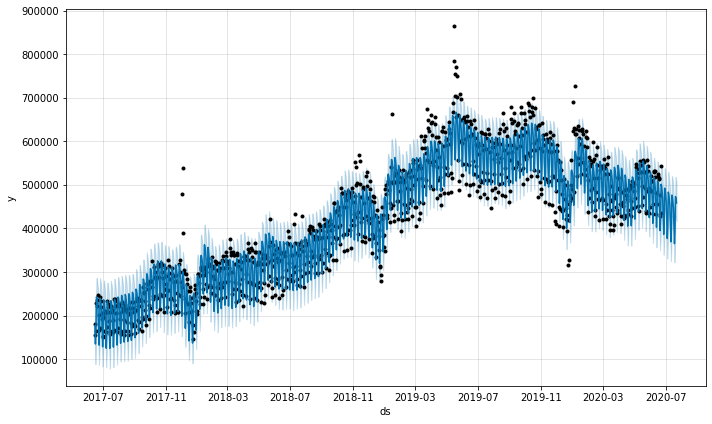

In [28]:
fig1 = m.plot(forecast)

#Explore Yearly, Weekly & Monthly Trends

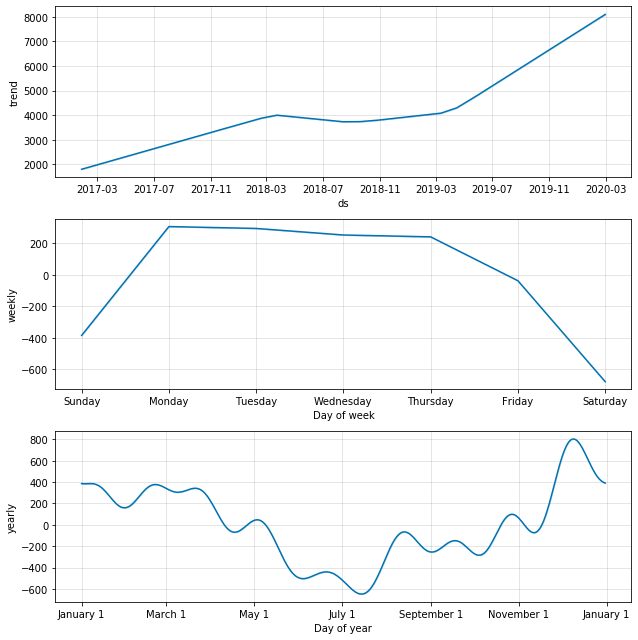

In [ ]:
fig2 = m.plot_components(forecast)

#[Optional] Pick a forecast date in the past to evaluate how well your actual data did vs. your model's prediction:

In [ ]:
forecast_date = '07-01-2019'


#Remove data that occured after start date

In [ ]:
mask = (df['ds'] < forecast_date)
df2 = df.loc[mask]
df2.head()

,ds,y
0,2017-01-27,2188
1,2017-01-28,2296
2,2017-01-29,1973
3,2017-01-30,2152
4,2017-01-31,2726


#Make & Fit Model + Forecast data points

In [ ]:

# Make model and fit it
m2 = Prophet()
m2.fit(df2)

# Make a future data frame
future = m2.make_future_dataframe(periods=90)
future.tail()

# Predict the GA data over the future period
forecast = m2.predict(future)
forecast.tail()
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
970,2019-09-24,4703.882530,4127.324696,5421.948093,4640.822220,4774.375448,61.562166,61.562166,61.562166,267.485306,267.485306,267.485306,-205.923140,-205.923140,-205.923140,0.0,0.0,0.0,4765.444696
971,2019-09-25,4706.570728,4064.679808,5381.036883,4642.169714,4778.081751,63.516597,63.516597,63.516597,262.550266,262.550266,262.550266,-199.033669,-199.033669,-199.033669,0.0,0.0,0.0,4770.087326
972,2019-09-26,4709.258927,4050.087148,5330.451689,4643.471753,4781.926128,8.476441,8.476441,8.476441,201.217551,201.217551,201.217551,-192.741111,-192.741111,-192.741111,0.0,0.0,0.0,4717.735368
973,2019-09-27,4711.947125,3834.107228,5126.787308,4645.000469,4785.527485,-230.644958,-230.644958,-230.644958,-43.696138,-43.696138,-43.696138,-186.948820,-186.948820,-186.948820,0.0,0.0,0.0,4481.302167
974,2019-09-28,4714.635324,3266.652617,4534.964235,4646.321513,4789.958589,-806.335174,-806.335174,-806.335174,-624.802090,-624.802090,-624.802090,-181.533083,-181.533083,-181.533083,0.0,0.0,0.0,3908.300150


#Plot the model's prediction

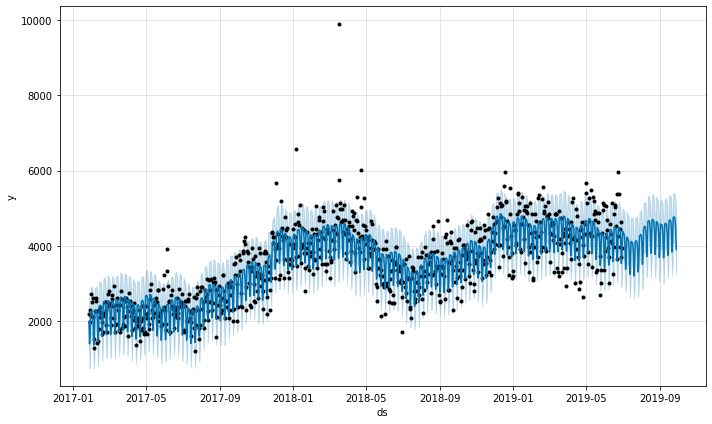

In [ ]:
# plot the forecast
fig2 = m2.plot(forecast)

In [ ]:
# Merge actuals with forecast
forecast_plot = forecast[['ds', 'yhat']]
df_inner = pd.merge(forecast_plot, df, on='ds', how='inner')
df_inner.tail()

,ds,yhat,y
970,2019-09-24,4765.444696,6386
971,2019-09-25,4770.087326,5632
972,2019-09-26,4717.735368,6565
973,2019-09-27,4481.302167,6242
974,2019-09-28,3908.300150,4054


In [ ]:

mask = (df_inner['ds'] > forecast_date)
df2_plot = df_inner.loc[mask]
df2_plot.tail()

,ds,yhat,y
970,2019-09-24,4765.444696,6386
971,2019-09-25,4770.087326,5632
972,2019-09-26,4717.735368,6565
973,2019-09-27,4481.302167,6242
974,2019-09-28,3908.300150,4054


#Evaluate actual results vs forecast to see how you did against the model's prediction

Prediction values are the light blue dashed line.

Actual values are the solid black line.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.



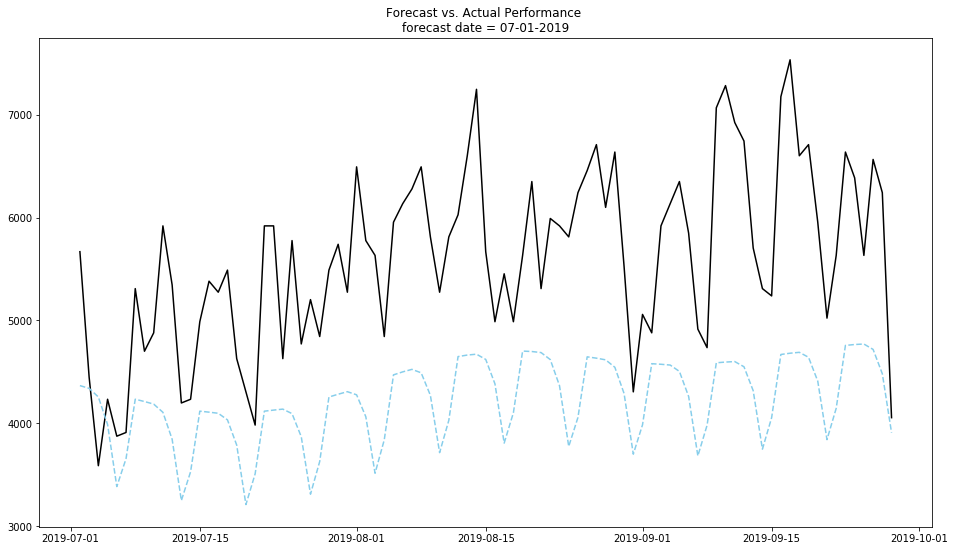

In [ ]:
# Plot actuals vs forecast
plt.figure(figsize=(16, 9))
plt.title(label='Forecast vs. Actual Performance \n' + 'forecast date = ' + forecast_date)
plt.plot('ds', 'y', data=df2_plot, color='black')
plt.plot('ds', 'yhat', data=df2_plot, color ='skyblue', linestyle='dashed')
plt.show()